Задача 1

In [713]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X = np.dot(X, np.random.randn(2, 2))


In [714]:
from sklearn.mixture import GaussianMixture

In [715]:
gm = GaussianMixture(n_components=4,covariance_type='spherical', random_state=100).fit(X)

In [716]:
gm.aic(X)

2034.064961888134

In [717]:
gm.means_

array([[ 1.06723901,  0.0276027 ],
       [ 0.50442088,  2.43607774],
       [-1.12030299,  1.82151632],
       [-1.15710992,  2.7213134 ]])

In [718]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gm(gm, X, ty = 1, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gm.weights_.max()
    for pos, covar, w in zip(gm.means_, gm.covariances_, gm.weights_):
        if ty == 0:
            covar = np.append(covar,covar)
        draw_ellipse(pos, covar, alpha=w * w_factor)

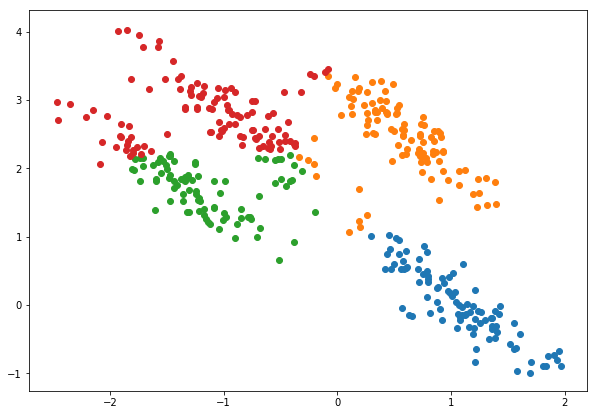

In [719]:
R=gm.predict(X)
R_0=R==0
R_1=R==1
R_2=R==2
R_3=R==3
plt.figure(figsize=(10, 7))
plt.scatter(X[R_0][:,0],X[R_0][:,1])

plt.scatter(X[R_1][:,0],X[R_1][:,1])

plt.scatter(X[R_2][:,0],X[R_2][:,1])

plt.scatter(X[R_3][:,0],X[R_3][:,1])
plt.show()

In [720]:
gm.aic(X)

2034.064961888134

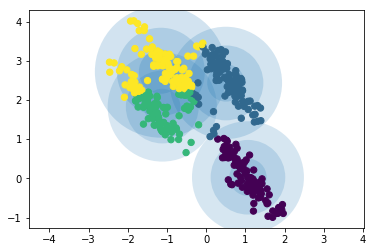

In [721]:
plot_gm(gm, X,0)

In [722]:
gm = GaussianMixture(n_components=4,covariance_type='diag', random_state=191).fit(X)

In [723]:
gm.means_

array([[-1.01696576,  2.78160572],
       [ 1.08894359,  0.01276574],
       [ 0.60151328,  2.35608063],
       [-1.1163036 ,  1.88059481]])

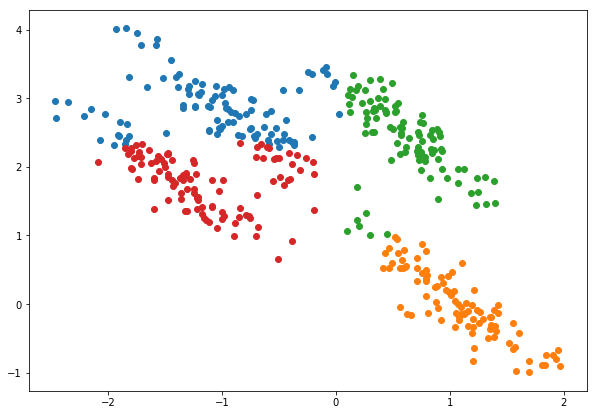

In [724]:
R=gm.predict(X)
R_0=R==0
R_1=R==1
R_2=R==2
R_3=R==3
plt.figure(figsize=(10, 7))
plt.scatter(X[R_0][:,0],X[R_0][:,1])

plt.scatter(X[R_1][:,0],X[R_1][:,1])

plt.scatter(X[R_2][:,0],X[R_2][:,1])

plt.scatter(X[R_3][:,0],X[R_3][:,1])
plt.show()

In [725]:
gm.aic(X)

2022.7398121495914

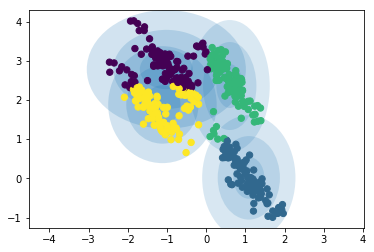

In [726]:
plot_gm(gm, X)

In [727]:
gm = GaussianMixture(n_components=4,covariance_type='full', random_state=50).fit(X)

In [728]:
gm.means_

array([[-0.85754458,  2.67414737],
       [ 1.0329264 ,  0.05833417],
       [-1.43236767,  1.85431386],
       [ 0.56569787,  2.5439466 ]])

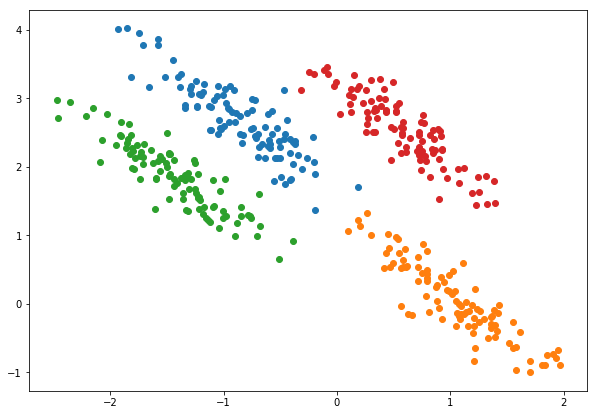

In [729]:
R=gm.predict(X)
R_0=R==0
R_1=R==1
R_2=R==2
R_3=R==3
plt.figure(figsize=(10, 7))
plt.scatter(X[R_0][:,0],X[R_0][:,1])

plt.scatter(X[R_1][:,0],X[R_1][:,1])

plt.scatter(X[R_2][:,0],X[R_2][:,1])

plt.scatter(X[R_3][:,0],X[R_3][:,1])

plt.show()

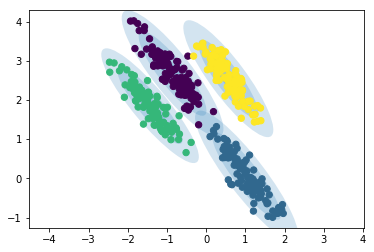

In [730]:
plot_gm(gm, X)

In [731]:
gm.aic(X)

1580.785129823508

Критерий, по которому автоматически выбирается "лучший" результат разделения из серии K запусков, может быть построен с помощью функции(метода) aic(X) , чем меньше её значение, тем лучше, таким образом,мы можем выбрать лучший результат автоматически. Но в данном примере всё сразу хорошо построилось, поэтому мы лишь попроверяли ручками.

Задача 2

In [732]:
from sklearn.datasets import load_digits

digits = load_digits()

In [733]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

data = pca.fit_transform(digits.data)

In [734]:
data.shape

(1797, 29)

In [735]:
gm = GaussianMixture(n_components=1000, random_state=0).fit(data)

In [736]:
data,_=gm.sample(n_samples=100)

In [737]:
data=pca.inverse_transform(data)

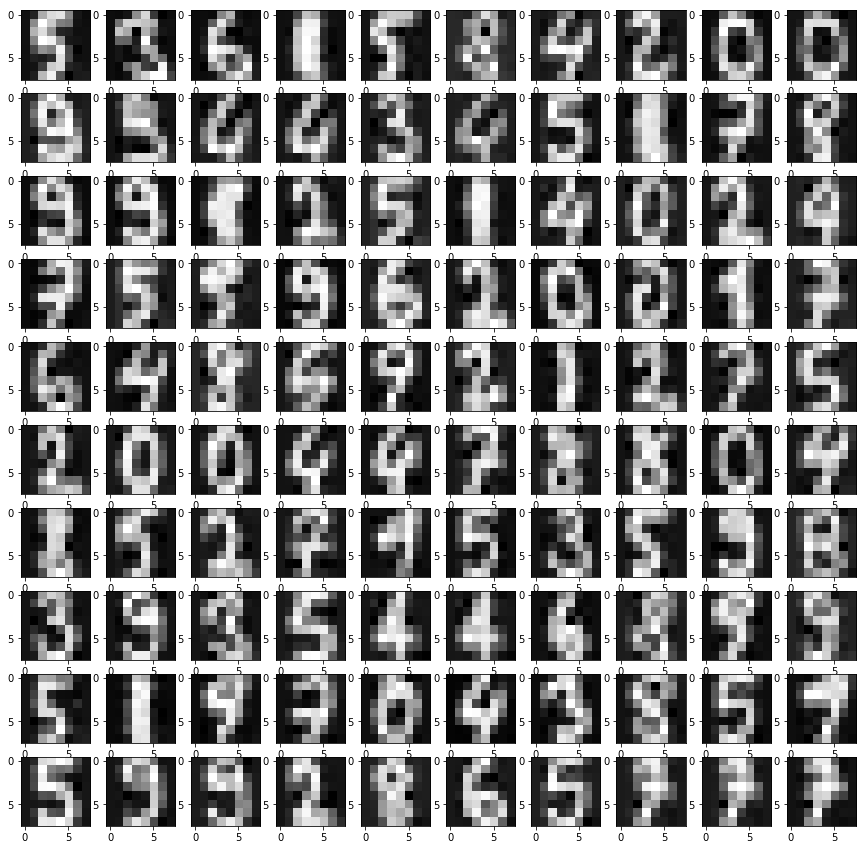

In [738]:
fig, axes = plt.subplots(nrows = 10, ncols =10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(data[i*10+j].reshape(8,8),cmap='gray')
plt.show()